# Classification: Logistic Regression. SVM

## The Logistic Classifier

Regression techniques are typically used for predicting the real-valued output. But what if the output is discrete and even binary - 0 and 1 - i.e. what if we are dealing with a binary classification problem based on the real-valued input variables? 

Consider a training sample of size $N$ for a binary output variable 
$${\displaystyle y = }
\left\{ \begin{array}{l l} 
{1} & \quad \text{event happened }\\ 
{0} & \quad \text{event not happened } \\
\end{array} \right.
$$
and $n$ regressors $x^j$: 
$$
X=\{x_i, i=1..N\}=\{x_i^j, i=1..N, j=1..n\},\ Y=\{y_i, i=1..N\}.
$$ 

As before, instead of trying to predict the spefic value of $y$, we admit its uncertainty considering it a binary random variable, trying to predict its probability distribution (Bernoulli as the only meaningfull one for a binary variable):

$$
P(y|x,\beta)=Bern(y|\mu(x,\beta))
$$

A simplest suggestion for $\mu$ would be a linear model:

$$
\mu(x,\beta)=x\beta,
$$

however as $\mu=P(d=1)$ is the probability, it can only take values between 0 to 1, while there is no good way to ensure that the linear form $x\beta$ takes value within this interval. This could be corrected by considering 
$$
\mu(x,\beta)=f(x\beta),
$$
where $f$ is a certain function taking values only between 0 and 1. As for this function $f$, one can select a sigmoid function
$$
f(x)=\sigma(x)=\frac{e^x}{1+e^x}=\frac{1}{1+e^{-x}}.
$$
Sigmoid function always takes values within the interval $(0,1)$. This way 

$$
{\displaystyle P(y=1) = \sigma(x\beta)=\frac{\exp(x\beta)}{1+\exp(x\beta)}}=\frac{1}{1+\exp(-x\beta)}
$$$$
\displaystyle P(y=0) = 1-P(y=1)=\frac{1}{1+\exp(x\beta)}
$$

Then the likelihood of getting observed values of the output variable $y_i$ corresponding to the inputs $x_i$ can be defined as
$$
L=\prod\limits_i P(y=y_i|x_i,\beta),
$$
while log-likelihood is
$$
log(L)=\sum\limits_i log\left(P(y=y_i|x_i,\beta)\right)=\sum\limits_i y_i log\left(P(y=1|x_i,\beta)\right)+
\sum\limits_i (1-y_i)log\left(P(y=0|x_i,\beta)\right)=
$$$$
-\sum\limits_i log\left(1+exp((2 y_i-1)x_i\beta)\right).
$$
Then
$$
\beta=argmin_{\beta} \sum\limits_i log\left(1+exp((2 y_i-1)x_i\beta)\right).
$$
The above optimization problem can no longer be solved in the closed analytic form, but instead a multivariate iterational numerical optimization heuristics, such as various gradient decent methods, could be applied. 

In [13]:
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing
%pylab inline

# To ignore some warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

Populating the interactive namespace from numpy and matplotlib


In [14]:
#set colormap
pylab.rcParams['image.cmap'] = 'RdYlGn'

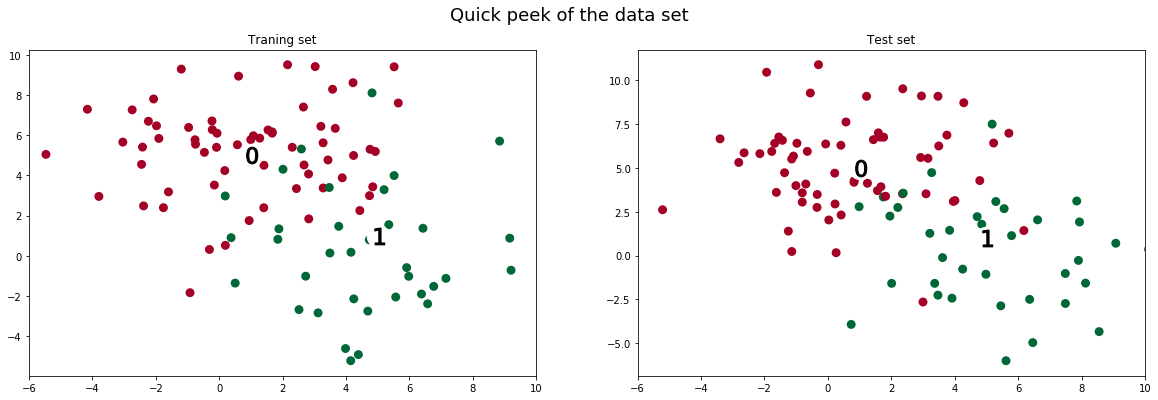

In [15]:
# generate some random 2d data points around two centroid points (1,5) and (5,1)
# classified based on which of the centroids was used, (1,5) label 0 and (5,1) with label 1
n = 100
random.seed(2016)
label = np.random.binomial(1, 0.4, size = 2*n)  # Bernoulli is binomial with n = 1
x1 = np.array([1,5])[label] + np.random.normal(0, 2.5, size = 2*n)
x2 = np.array([5,1])[label] + np.random.normal(0, 2.5, size = 2*n)

#visualization
fig1 = plt.figure(figsize = (20,6))
plt.suptitle("Quick peek of the data set", fontsize = 18)
ax1, ax2 = fig1.add_subplot(121), fig1.add_subplot(122)
ax1.scatter(x1[:n], x2[:n], lw = 0, s = 80, c = label[:n])
ax2.scatter(x1[n:], x2[n:], lw = 0, s = 80, c = label[n:])
ax1.set(title = 'Traning set', xlim = [-6,10])
ax2.set(title = 'Test set', xlim = [-6,10])

ax1.scatter([1,5], [5,1], marker='o', c="w", s=500)
ax2.scatter([1,5], [5,1], marker='o', c="w", s=500)
for i, c in enumerate([1,5]):
    ax1.scatter(c, 6-c, marker='$%d$'%i, s=280, color = 'k')
    ax2.scatter(c, 6-c, marker='$%d$'%i, s=280, color = 'k')

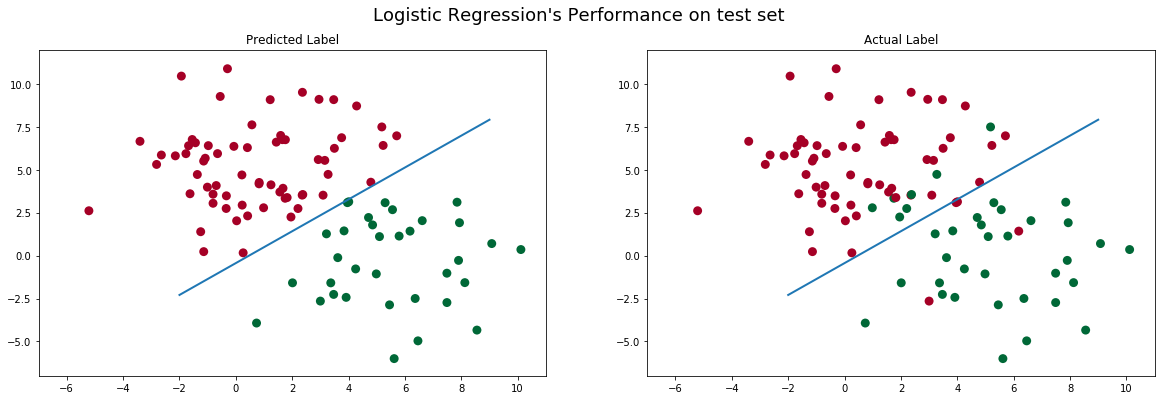

Accuracy=0.89


In [16]:
#learn logistic regression over the training sample
logit = LogisticRegression()
# C is an inverse regularization constant. More detail when we consider Bayesian inference, 
# for now lets just mention that higher C mean no regularization
X_train=np.c_[x1[:n], x2[:n]]
X_test=np.c_[x1[n:], x2[n:]]
Y_train=label[:n]
logit.fit(X_train,Y_train)

#apply to the validation sample
labelPred = logit.predict(X_test)
labelActual = label[n:]

#visualize the actual and learned classification
fig2 = plt.figure(figsize = (20,6))
plt.suptitle("Logistic Regression's Performance on test set", fontsize = 18)
ax1, ax2 = fig2.add_subplot(121), fig2.add_subplot(122)

#show decision boundary on both plots
xplot = np.linspace(-2,9,200)
yplot = -(logit.intercept_[0] + logit.coef_[0][0]*xplot)/logit.coef_[0][1]
ax1.plot(xplot,yplot,lw = 2)
ax2.plot(xplot,yplot,lw = 2)

ax1.set(title='Predicted Label', xlim = [-7,11], ylim = [-7,12])
ax2.set(title='Actual Label', xlim = [-7,11], ylim = [-7,12])
ax1.scatter(x1[n:], x2[n:], lw = 0, s = 80, c = labelPred)
ax2.scatter(x1[n:], x2[n:], lw = 0, s = 80, c = labelActual)
plt.show()
correct=1.0*(labelPred==labelActual).sum()/len(labelPred)
print('Accuracy={}'.format(correct))

Accuracy=0.91


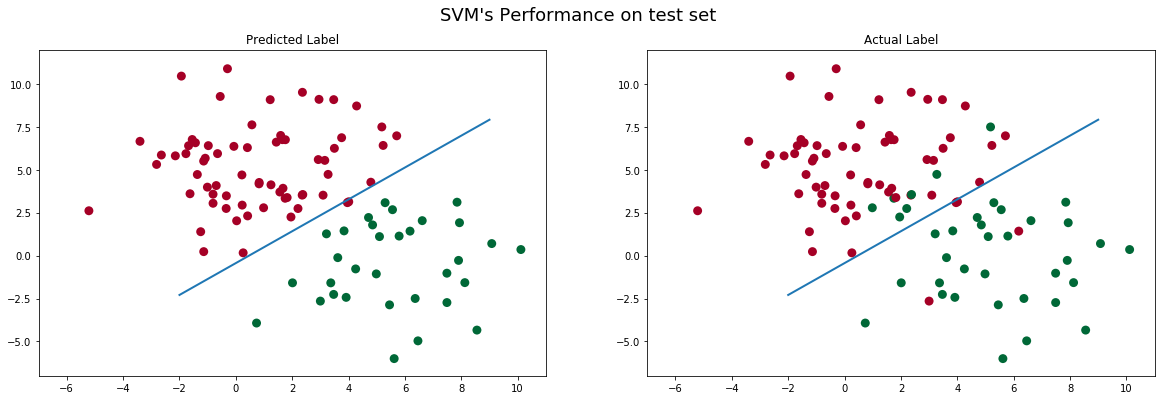

In [17]:
#redo the same classification with SVM
X_train=np.c_[x1[:n], x2[:n]]
Y_train=label[:n]
clf = svm.SVC(kernel='linear',C=1)
clf.fit(X_train, Y_train)
labelPred=clf.predict(X_test)
correct=1.0*(labelPred==labelActual).sum()/len(labelPred)
print('Accuracy={}'.format(correct))

fig2 = plt.figure(figsize = (20,6))
plt.suptitle("SVM's Performance on test set", fontsize = 18)
ax1, ax2 = fig2.add_subplot(121), fig2.add_subplot(122)
#decision boundary
xplot = np.linspace(-2,9,200)
yplot = -(logit.intercept_[0] + logit.coef_[0][0]*xplot)/logit.coef_[0][1]
ax1.plot(xplot,yplot,lw = 2)
ax2.plot(xplot,yplot,lw = 2)

ax1.set(title='Predicted Label', xlim = [-7,11], ylim = [-7,12])
ax2.set(title='Actual Label', xlim = [-7,11], ylim = [-7,12])
ax1.scatter(x1[n:], x2[n:], lw = 0, s = 80, c = labelPred)
ax2.scatter(x1[n:], x2[n:], lw = 0, s = 80, c = labelActual)
plt.show()

In [18]:
#logistic regression can also give certainty (probability) for each label in the classification
logitProbability = logit.predict_proba(np.c_[x1[n:], x2[n:]])[:,1]
logitProbability[0:10]

array([5.23653276e-01, 1.14878923e-02, 4.34174529e-02, 9.92549336e-01,
       1.77609338e-01, 2.01955949e-01, 3.62544625e-01, 3.41162519e-03,
       5.38201632e-04, 2.48126894e-02])

In [19]:
# This is how predicted label was created
logitProbability[0:10]>0.5

array([ True, False, False,  True, False, False, False, False, False,
       False])

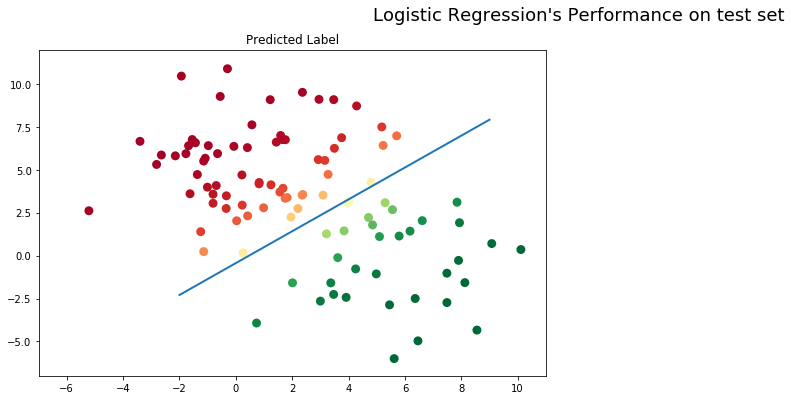

In [20]:
#visualize the prediction label probabilities 
fig2 = plt.figure(figsize = (20,6))
plt.suptitle("Logistic Regression's Performance on test set", fontsize = 18)
ax1 = fig2.add_subplot(121)

#decision boundary
ax1.plot(xplot,yplot,lw = 2)
ax2.plot(xplot,yplot,lw = 2)

ax1.set(title='Predicted Label', xlim = [-7,11], ylim = [-7,12])
ax1.scatter(x1[n:], x2[n:], lw = 0, s = 80, c = logitProbability)
plt.show()

## Confusion matrix

Fit of the binary classifier over the selected test set can be characterized by the confusion matrix
$$
\left[\begin{array}{c|c}TP&FN\\
\hline
FP&TN\end{array}\right]
$$
with
* $TP$ - number of true positives (correctly classified positives ($y_i=1$)), 
* $FP$ - number of false positives (observed negatives ($y_i=0$) incorrectly classified as positives ($y_i=1$)), 
* $FN$ - number of false negatives (observed positives ($y_i=1$) incorrectly classified as negatives ($y_i=0$)), 
* $TN$ - number of true negatives (correctly classified negatives ($y_i=0$)).

In relative terms the following quantities are often considered:

* Precision or positive predictive value (fraction of true positive classifications among all actual positive observations):
$$
PPV=\frac{TP}{TP+FP},
$$
* Sensitivity or recall or true positive rate (fraction of true positives among all positive classifications):
$$
TPR=\frac{TP}{TP+FN},
$$
* Accuracy (fraction of true classifications among all instances considered)
$$
ACC=\frac{TP+TN}{TP+TN+FP+FN}.
$$

In [21]:
#compute TP,FP,FN,TN for the above classification
TP = sum((labelPred==1)&(labelActual==1))
FP = sum((labelPred==1)&(labelActual==0))
FN = sum((labelPred==0)&(labelActual==1))
TN = sum((labelPred==0)&(labelActual==0))

#compute precision, accuracy and recall
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Precision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))

Precision = 93.75%
Accuracy = 91.00%
Recall = 81.08%


In [22]:
def print_confusion_matrix(predictions, labels):
    # Function for printing Confusion matrix, based on labels and predictions
    ls = list(confusion_matrix(predictions, labels)) ## returns tn, fp, fn, tp
    ls = pd.DataFrame(ls, columns = ['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
    print ("Confusion Matrix:\n", ls)
    
print_confusion_matrix(labelPred, labelActual)

Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                  61                   7
Actual Positive                   2                  30


All three performance metrics are quite high, indicating our model's good performance, thanks to the separability of the data

## Find Manhattan based on 311 profiles of locations

In [23]:
path='data/'
#upload previous data we had on 311
data311 = pd.read_csv( path+'aggr311.csv' , index_col=0 )
data311.head()

,Zip,Complain,Count
1,NaN,Adopt-A-Basket,5
2,10001,Adopt-A-Basket,1
3,10003,Adopt-A-Basket,1
4,10009,Adopt-A-Basket,1
5,10010,Adopt-A-Basket,1


In [24]:
data311.Zip=pd.to_numeric(data311.Zip,errors='coerce')

In [25]:
data311=data311.loc[(data311.Zip>=10000)&(data311.Zip<11500)] #take only NYC zip codes

In [26]:
data311=pd.pivot_table(data311,index='Zip',columns='Complain',values='Count',fill_value=0)

In [27]:
data311.head()

Complain,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10000.0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,8,8,0,0,0,0,0
10001.0,0,1,90,0,0,1,20,36,1,1,...,3,0,2,51,5,5,2,366,0,0
10002.0,15,0,80,0,0,21,18,20,2,6,...,5,1,4,27,14,10,7,324,0,0
10003.0,15,1,143,0,2,44,24,13,2,2,...,7,11,2,54,25,12,5,318,0,0
10004.0,0,0,15,0,0,4,3,1,0,1,...,1,1,0,16,21,0,0,37,0,0


In [28]:
#normalize and filter the data
Total311=data311.sum(axis=1) #total 311 activity per zip code
data311=data311.div(data311.sum(axis=1), axis=0) #normalize activity of various cathegories within zip code by total
data311=data311.loc[Total311>100] #keep only those zip codes having sufficient activity

In [29]:
# create borough labels 
Z=np.array(data311.index)
manhattanInd=(Z>10000)&(Z<10300) #Manhattan
statenInd=(Z>=10300)&(Z<10400) #Staten Island
brooklynInd=(Z>=11000)&(Z<11300) #Brooklyn
queensInd=(Z>=11300)&(Z<11500) #Queens
bronxInd=(Z>=10400)&(Z<10500) #Bronx
#create an array of the same length as data311 index providing the borough number
D=Z*0
D[manhattanInd]=1
D[statenInd]=2
D[brooklynInd]=3
D[queensInd]=4
D[bronxInd]=5

In [30]:
#standardize the data
scaler311 = preprocessing.StandardScaler().fit(data311)
data311S=scaler311.transform(data311)  

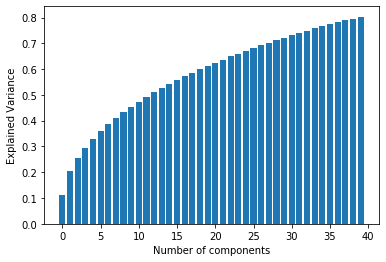

In [31]:
#perform PC decomposition over data311
pca = PCA(data311S.shape[1])
data311P=pca.fit_transform(data311S)
eigenvalues = pca.explained_variance_ratio_
#plot explained variance over the number of compinents
n=40
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

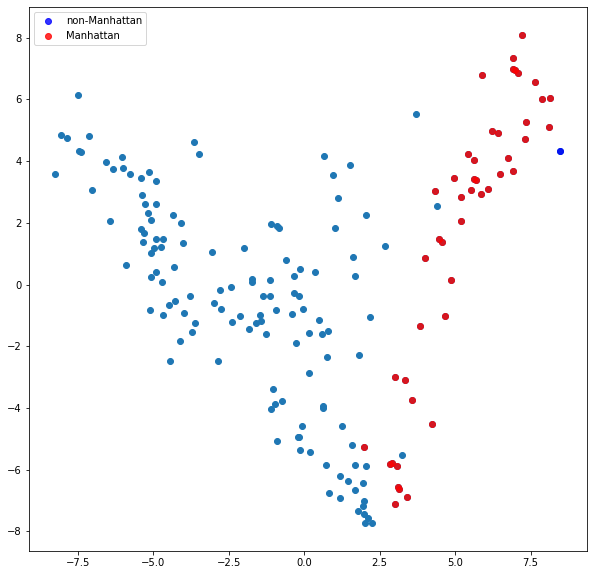

In [32]:
#visualize the zip code prifiles by two leading principal components
#mark Manhattan zip codes red
colors=('blue','red')
fig = plt.figure(figsize=(10,10))
for d in range(0,2):
    plt.plot(np.array(data311P[D==d,0]), np.array(data311P[D==d,1]),
        'o', color=colors[d], alpha=0.8, label=d)
plt.legend(['non-Manhattan','Manhattan'],loc='upper left')
plt.scatter(data311P[:,0],data311P[:,1])

In [33]:
# Train logistic regression reporting the number of misclassified zip codes
logreg = LogisticRegression()
Y=1.0*(D==1)
logreg.fit(data311P[:,0:2], Y)
Z = logreg.predict(data311P[:,0:2])

(-10, 10)

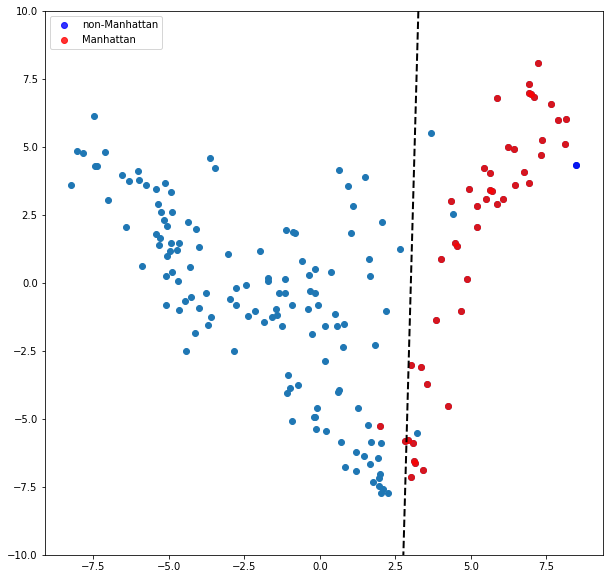

In [34]:
# visualize the zip code prifiles by two leading principal components
# mark Manhattan zip codes red
colors=('blue','red')
fig = plt.figure(figsize=(10,10))
for d in range(0,2):
    plt.plot(np.array(data311P[D==d,0]), np.array(data311P[D==d,1]),
        'o', color=colors[d], alpha=0.8, label=d)
plt.legend(['non-Manhattan','Manhattan'],loc='upper left')
plt.scatter(data311P[:,0],data311P[:,1])

xplot = np.linspace(2.5,7.5,200) ## returns evenly spaced numbers
yplot = -(logreg.intercept_[0] + logreg.coef_[0][0]*xplot)/logreg.coef_[0][1]
plt.plot(xplot, yplot, 'k--', lw = 2)
plt.ylim(-10, 10)

In [35]:
print('LOGISTIC REGRESSION \nErrors={0}'.format(sum(Z!=Y)))
print_confusion_matrix(Z, Y)

LOGISTIC REGRESSION 
Errors=6
Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                 129                   2
Actual Positive                   4                  44


In [36]:
#train support vector machines reporting the number of misclassified zip codes
svmodel = svm.SVC(kernel='linear')
svmodel.fit(data311P[:,0:2], Y)
Z2 = svmodel.predict(data311P[:,0:2])
print('SVM (Linear kernel) \nErrors={0}'.format(sum(Z!=Y)))
print_confusion_matrix(Z2, Y)

SVM (Linear kernel) 
Errors=6
Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                 130                   1
Actual Positive                   3                  45


In [37]:
#train non-linear support vector machines with Gausian kernel reporting the number of misclassified zip codes
svmodel = svm.SVC(kernel='rbf') #Gausian kernel
svmodel.fit(data311P[:,0:2], Y)
Z2 = svmodel.predict(data311P[:,0:2])
print('SVM (Gaussian Kernel) \nErrors={0}'.format(sum(Z!=Y)))
print_confusion_matrix(Z2, Y)

SVM (Gaussian Kernel) 
Errors=6
Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                 131                   1
Actual Positive                   2                  45


In [38]:
#visualize the classification - see which zip codes are misclassified as Manhattan 
NYCzip=gpd.read_file(path+'NY.shp')

In [39]:
colors=['green','blue','red','yellow','magenta','cyan']
def plot_on_map(gdf,Y): #take geopandas dataframe gdf with zip code shapefiles and the dictionary mapping zip codes to clusters
    #visualize zip codes using clusters for picking colors        
    f, ax = plt.subplots(1, figsize=(12, 12))     
    for c in range(max(Y.values())+1): #for each cluster
        gdf.loc[gdf.zipcode.map(Y)==c].plot(axes=ax, color=colors[c]) #visualize zip codes which belong to it using cluster color

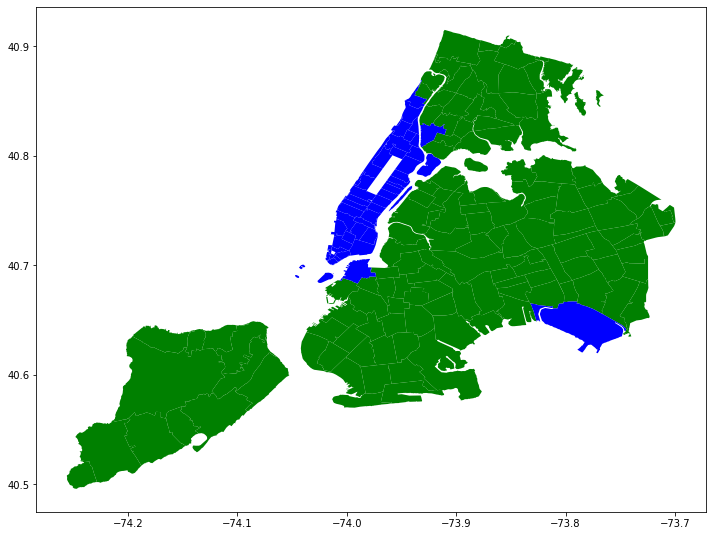

In [40]:
plot_on_map(NYCzip,{data311.index[i]:int(Z[i]) for i in range(len(Z))})

#### Multiclass classification for boroughs.

In [41]:
# Logistic regression can be also trained for multi-class classification
logreg = LogisticRegression()
Y=D
X=data311P[:,:10]
logreg.fit(X, Y)
M = logreg.predict(X)
#report accuracy
1.0*sum(M==D)/len(M)

0.8938547486033519

In [42]:
#certainty of classification
pd.DataFrame(logreg.predict_proba(X)).head()

,0,1,2,3,4,5
0,0.876069,0.079808,0.027467,6.336151e-11,0.016655,1.459628e-09
1,0.019572,0.958459,0.007022,4.057861e-04,0.003584,1.095647e-02
2,0.025269,0.876323,0.008178,4.527220e-02,0.010343,3.461513e-02
3,0.021130,0.925552,0.039255,1.257341e-02,0.000804,6.847366e-04
4,0.035782,0.939783,0.011772,5.355667e-03,0.001156,6.151732e-03


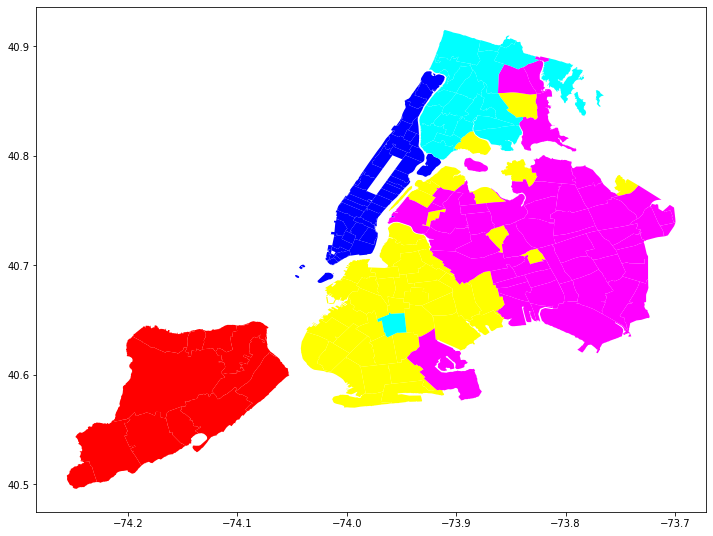

In [43]:
plot_on_map(NYCzip,{data311.index[i]:int(M[i]) for i in range(len(Z))})

## Multiclass classification. Iris dataset with sklearn

Logistic Regression from sklearn could equally well handle a multiclass classification

In [44]:
# import classic Iris data
iris = datasets.load_iris()
X = iris.data
Y = iris.target
print (iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [45]:
X[0:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [46]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
#train logistic regression based on first two features
logreg = LogisticRegression()
logreg.fit(X[:,:2], Y)
Z = logreg.predict(X[:,:2])

In [48]:
Z

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 0, 2, 2,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2])

In [49]:
#in case of multi-class classification Logistic regression provides probabilities for each possible label value
logreg.predict_proba(X[:,:2])[0:10,:]

array([[0.81805573, 0.11409786, 0.06784641],
       [0.6427973 , 0.22443659, 0.13276611],
       [0.78477656, 0.14410058, 0.07112287],
       [0.76679792, 0.15808408, 0.075118  ],
       [0.855267  , 0.09362408, 0.05110892],
       [0.87847072, 0.07292453, 0.04860475],
       [0.85119856, 0.10336521, 0.04543623],
       [0.80251271, 0.12576696, 0.07172033],
       [0.72668577, 0.18946154, 0.08385269],
       [0.70068565, 0.18993101, 0.10938334]])

No handles with labels found to put in legend.


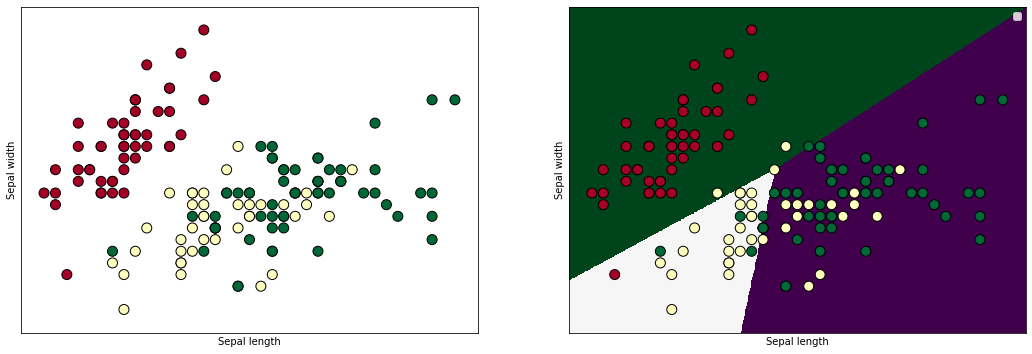

In [50]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max] times [y_min, y_max].
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 600), np.linspace(y_min, y_max, 600))
Zs = logreg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

fig4 = plt.figure(3, figsize=(18, 6))
ax1, ax2 = fig4.add_subplot(121), fig4.add_subplot(122)

# Plot the dots with labels only
ax1.scatter(X[:, 0], X[:, 1], c=Y, s = 100, edgecolors='k')
ax1.set(xlabel = 'Sepal length', ylabel='Sepal width', xticks=(), yticks=(),
       xlim = ((xx.min(), xx.max())), ylim = ((yy.min(), yy.max())))

# Plot the decision boundaries and the partition areas
ax2.pcolormesh(xx, yy, Zs, cmap = plt.cm.PRGn_r)
ax2.scatter(X[:, 0], X[:, 1], c=Y, s = 100, edgecolors='k')
ax2.set(xlabel = 'Sepal length', ylabel='Sepal width', xticks=(), yticks=(),
       xlim = ((xx.min(), xx.max())), ylim = ((yy.min(), yy.max())))
plt.legend()
plt.show()

While one of the labels appear to be perfectly separable, the other two are more mixed

In [51]:
#which is also confirmed by low accuracy
correct=1.0*(Z==Y).sum()/len(Y)
print('Accuracy={}'.format(correct))

Accuracy=0.7666666666666667


In [52]:
#see if taking all 4 available regressors could help
logreg = LogisticRegression()
logreg.fit(X, Y)
Z = logreg.predict(X)
correct=1.0*(Z==Y).sum()/len(Y)
print('Accuracy={}'.format(correct))

Accuracy=0.96
